In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

# Train-test split
from sklearn.model_selection import train_test_split


# Hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Metrics

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Additionals

from pprint import pprint
from math import sqrt


# DataSet

In [2]:
df = pd.read_csv('data/final_data.csv')
df.head()

Unnamed: 0     DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  \
0           0  2014-04-22                7405           24.0   
1           1  2014-04-23                7405           24.0   
2           2  2014-04-24                7405           24.0   
3           3  2014-04-25                7405           24.0   
4           4  2014-04-26                7405           24.0   

   AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0             289.421362     182.059312  107.362050  37.939251      78.935409   
1             270.239793     171.052782   99.187011  60.756579      70.627109   
2             262.842748     168.241977   94.600770  63.046800      66.049151   
3             255.526995     165.538903   89.988092  64.547229      61.405386   
4             247.199052     162.422242   84.776810  65.723694      56.147906   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  
0        631.47      90439.09           0.0  
1       1166.46     165720.39           0.0  
2       1549.81     221707.31           0.0  
3       1248.70     178063.52           0.0  
4       1345.78     192602.19           0.0

In [3]:
df.shape

(7879, 12)

# Data Scaling

In [4]:
dfnew = df.drop(['DATEPRD' , 'NPD_WELL_BORE_CODE'], axis=1)

scaler_all_data = MinMaxScaler()
data_scaled = scaler_all_data.fit_transform(dfnew)
df_data_scaled=pd.DataFrame(data_scaled)
df_data_scaled.head(5)

0     1         2         3         4         5         6         7  \
0  0.000000  0.96  0.939509  0.702695  0.888107  0.405726  0.744427  0.106970   
1  0.000127  0.96  0.877243  0.660213  0.820483  0.649736  0.666073  0.197620   
2  0.000254  0.96  0.853231  0.649364  0.782545  0.674228  0.622899  0.262577   
3  0.000381  0.96  0.829482  0.638931  0.744389  0.690274  0.579104  0.211555   
4  0.000508  0.96  0.802449  0.626901  0.701281  0.702855  0.529522  0.228005   

          8         9  
0  0.106227  0.054006  
1  0.194679  0.054006  
2  0.260460  0.054006  
3  0.209181  0.054006  
4  0.226263  0.054006

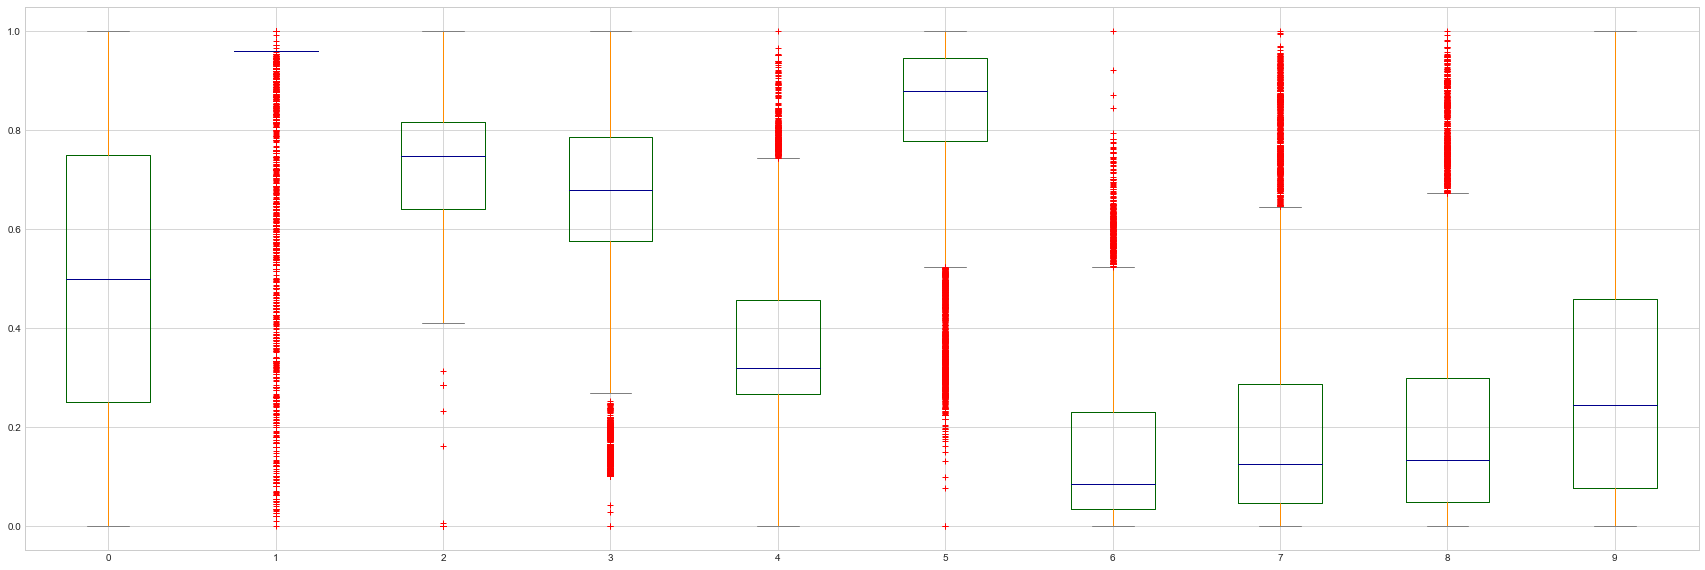

In [5]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
bp_scaled_all_data = df_data_scaled.plot.box(color=color, sym='r+' ,figsize=(30,10))

# Oil & Gas Production Rate Prediction

In [6]:
dfnew= df.filter(['ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_OIL_VOL', 'BORE_GAS_VOL'], axis=1)
dfnew.head(5)

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
0           24.0             289.421362     182.059312  107.362050  37.939251   
1           24.0             270.239793     171.052782   99.187011  60.756579   
2           24.0             262.842748     168.241977   94.600770  63.046800   
3           24.0             255.526995     165.538903   89.988092  64.547229   
4           24.0             247.199052     162.422242   84.776810  65.723694   

   DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  
0      78.935409        631.47      90439.09  
1      70.627109       1166.46     165720.39  
2      66.049151       1549.81     221707.31  
3      61.405386       1248.70     178063.52  
4      56.147906       1345.78     192602.19

In [7]:
X = dfnew.filter(['DATEPRD','NPD_WELL_BORE_CODE','ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE'])
Y = dfnew[['BORE_OIL_VOL', 'BORE_GAS_VOL']]
print('Features shape:', X.shape)
print('Target shape', Y.shape)


Features shape: (7879, 6)
Target shape (7879, 2)


### Selection of data set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)


Time=df.iloc[:,0]
Time_train, Time_test = train_test_split(Time, test_size=0.3, random_state=42)

In [9]:
# Random analysis to fit Random forest 
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train) #Random_state is the seed used by the random number generator
predictions_rf = rf.predict(X_test)

# Metrics
print('Model score:',              round(rf.score(X_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions_rf),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions_rf)),2))
print('R2:',                       round(r2_score(y_test, predictions_rf),2))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model score: 0.97
Mean absolute error: 7779.38
Root mean squared error: 24968.18
R2: 0.97


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


### Features importances

In [10]:
# List of features
feature_list = list(X_train.columns)

# Get numerical feature importances (Gini importance)
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVG_WHP_P                      Importance: 0.51
Variable: AVG_WHT_P                      Importance: 0.32
Variable: AVG_DP_TUBING                  Importance: 0.06
Variable: ON_STREAM_HRS                  Importance: 0.04
Variable: AVG_DOWNHOLE_PRESSURE          Importance: 0.04
Variable: DP_CHOKE_SIZE                  Importance: 0.02


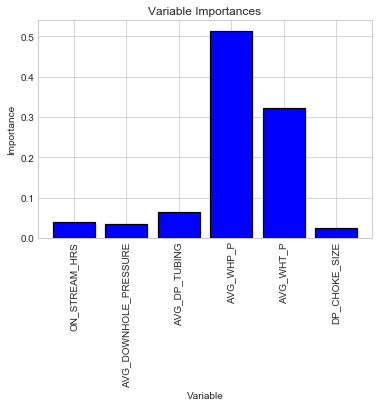

In [11]:
# list of x locations for plotting
X_testues = list(range(len(importances)))

# Make a bar chart
plt.bar(X_testues, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(X_testues, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

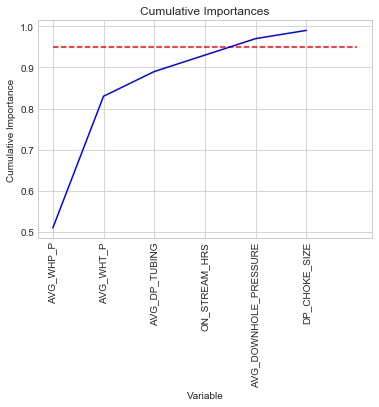

In [12]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(X_testues, cumulative_importances, 'b-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(X_testues, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [13]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5


In [14]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]

# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# # Create training and testing sets with only the important features
important_train_features = X_train.iloc[:, important_indices]
important_val_features = X_test.iloc[:, important_indices]

# # Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important val features shape:', important_val_features.shape)

Important train features shape: (5515, 5)
Important val features shape: (2364, 5)


### Training and testing in features selected 
Then, we evaluate on the **test data set** the performance using the important features.

In [15]:
# Train the expanded model on only the important features
rf.fit(important_train_features, y_train);

In [16]:
# Make predictions on validation data
predictions_import = rf.predict(important_val_features)

# Metrics
print('Mean absolute error:',  round(mean_absolute_error(y_test, predictions_import),2))
print('Root mean squared error:',   round(sqrt(mean_squared_error(y_test, predictions_import)),2))
print('R2:',                   round(r2_score(y_test, predictions_import),2))
print('Explained variance score:', explained_variance_score(y_test, predictions_import))

Mean absolute error: 8338.13
Root mean squared error: 25507.03
R2: 0.97
Explained variance score: 0.9659093146903484


In [17]:
# We require to import the time library for the run time evaluation
import time

# All features training and testing time
all_features_time = []

# We decide to do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(X_train, y_train)
    all_features_predictions = rf.predict(X_test)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features total training and testing time:', round(all_features_time, 2), 'seconds.')

All features total training and testing time: 0.26 seconds.


In [18]:
# Time training and testing for reduced feature set
reduced_features_time = []

# We decide to do 10 iterations and take average for reduced features
for _ in range(10):
    start_time = time.time()
    rf.fit(important_train_features, y_train)
    reduced_features_predictions = rf.predict(important_val_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('Reduced features total training and testing time:', round(reduced_features_time, 2), 'seconds.')

Reduced features total training and testing time: 0.21 seconds.


In [19]:
# Mean absolute error
all_mean_absolute_error=mean_absolute_error(y_test, predictions_rf)
reduced_mean_absolute_error=mean_absolute_error(y_test, predictions_import)

# Root squared mean error
all_root_mean_squared_error=sqrt(mean_squared_error(y_test, predictions_rf))
reduced_root_mean_squared_error=sqrt(mean_squared_error(y_test, predictions_import))

# R2 score
all_r2_score=r2_score(y_test, predictions_rf)
reduced_r2_score=r2_score(y_test, predictions_import)

# Summarize the data in a Dataframe
comparison = pd.DataFrame({'Features': ['all (8)', 'reduced (5)'], 
                           'R2': [round(all_r2_score, 2), round(reduced_r2_score, 2)],
                           'Mean absolute error': [round(all_mean_absolute_error, 2), round(reduced_mean_absolute_error, 2)],
                           'Root mean squared error': [round(all_root_mean_squared_error, 2), round(reduced_root_mean_squared_error, 2)],
                           'Run time': [round(all_features_time, 2), round(reduced_features_time, 2)]})

comparison[['Features','R2', 'Mean absolute error', 'Root mean squared error', 'Run time']]

Features    R2  Mean absolute error  Root mean squared error  Run time
0      all (8)  0.97              7779.38                 24968.18      0.26
1  reduced (5)  0.97              8338.13                 25507.03      0.21

### Examine the default Random Forest to determine parameters


In [20]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


### Defining hyperparameters

In [21]:
# Definition of specific parameters for Random forest 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 30, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [4, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 4, 5, 10],
 'n_estimators': [2,
                  107,
                  212,
                  317,
                  422,
                  527,
                  632,
                  738,
                  843,
                  948,
                  1053,
                  1158,
                  1263,
                  1369,
                  1474,
                  1579,
                  1684,
                  1789,
                  1894,
                  2000]}


### Random search with cross validation
In cross validation, the training set is split into k smaller sets. We require to follow the following steps: 
* A model is trained using $k-1$of the folds as training data (Block of the data to train).
* The resulting model is validated on the remaining part of the data (Test data). Therefore, we can test the best parameters in this part od the data.
* The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 
* The method is computationally expensive. 
![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [22]:
rf = RandomForestRegressor(random_state = 42)

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations.
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter = 15, scoring='neg_mean_absolute_error',  cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.4min finished


### Definition of best hyperparameters

In [23]:
# Obtaining the best parameters
rf_random.best_params_

{'n_estimators': 422,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

### Evaluation of parameters in test set

In [24]:
best_random = rf_random.best_estimator_.fit(X_train, y_train)
predictions_best_random_test = best_random.predict(X_test)
predictions_best_random_train = best_random.predict(X_train)

print('Model score:', round(best_random.score(X_test, y_test),2))
print('Mean absolute error:', round(mean_absolute_error(y_test, predictions_best_random_test),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test, predictions_best_random_test)),2))
print('R2:', round(r2_score(y_test, predictions_best_random_test),2))

r2_rf=r2_score(y_test, predictions_best_random_test)
Mean_absolute_error_rf=mean_absolute_error(y_test, predictions_best_random_test)
Root_mean_squared_error_rf=sqrt(mean_squared_error(y_test, predictions_best_random_test))

Model score: 0.97
Mean absolute error: 7275.38
Root mean squared error: 23746.05
R2: 0.97


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


### Visualization of  prediction with best hyperparameters

In [285]:
result_df = pd.DataFrame({'BORE_OIL_VOL': y_test, 'Predicted': predictions_best_random_test})
result_df

BORE_OIL_VOL    Predicted
0           162.02   159.288661
1          3186.96  3231.966848
2           569.14   601.815872
3          2905.92  3117.794198
4          2530.04  2631.232472
...            ...          ...
2359       1310.29  1189.380575
2360        175.96   185.637449
2361       3015.97  2980.405707
2362        303.82   367.867128
2363       1846.83  1937.247852

[2364 rows x 2 columns]

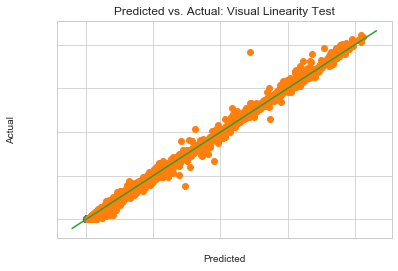

In [26]:
from scipy import stats
import statsmodels as sm

y = y_train
X_train_np = np.array(X_train)
y_np = np.array(y)

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

#predict y values for training data
y_hat = predictions_best_random_train 

#plot predicted vs actual
plt.plot(y_hat,y_np,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()